<a href="https://colab.research.google.com/github/Aishwarya-byte21/Diamond-Price-Prediction/blob/main/Diamonds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 #Load Dataset & Data Preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/diamonds.csv")
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
df.shape


(53940, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
df.describe()


,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
df.isnull().sum()


,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


In [ ]:
(df[['x','y','z']] == 0).sum()


,0
x,8
y,7
z,20


In [ ]:
df[(df['x']==0) | (df['y']==0) | (df['z']==0)].shape


(20, 10)

In [ ]:
df[['x','y','z']] = df[['x','y','z']].replace(0, np.nan)


In [ ]:
df.isnull().sum()


,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,8
y,7
z,20


In [ ]:
df['x'].fillna(df['x'].median(), inplace=True)
df['y'].fillna(df['y'].median(), inplace=True)
df['z'].fillna(df['z'].median(), inplace=True)


/tmp/ipython-input-2468549500.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['x'].fillna(df['x'].median(), inplace=True)
/tmp/ipython-input-2468549500.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [ ]:
df.isnull().sum()


,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


In [ ]:
df.columns


Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')


In [ ]:
df.shape


(53940, 10)

In [ ]:
df.describe()


,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.732003,5.735267,3.540043
std,0.474011,1.432621,2.234491,3989.439738,1.119587,1.140265,0.702400
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


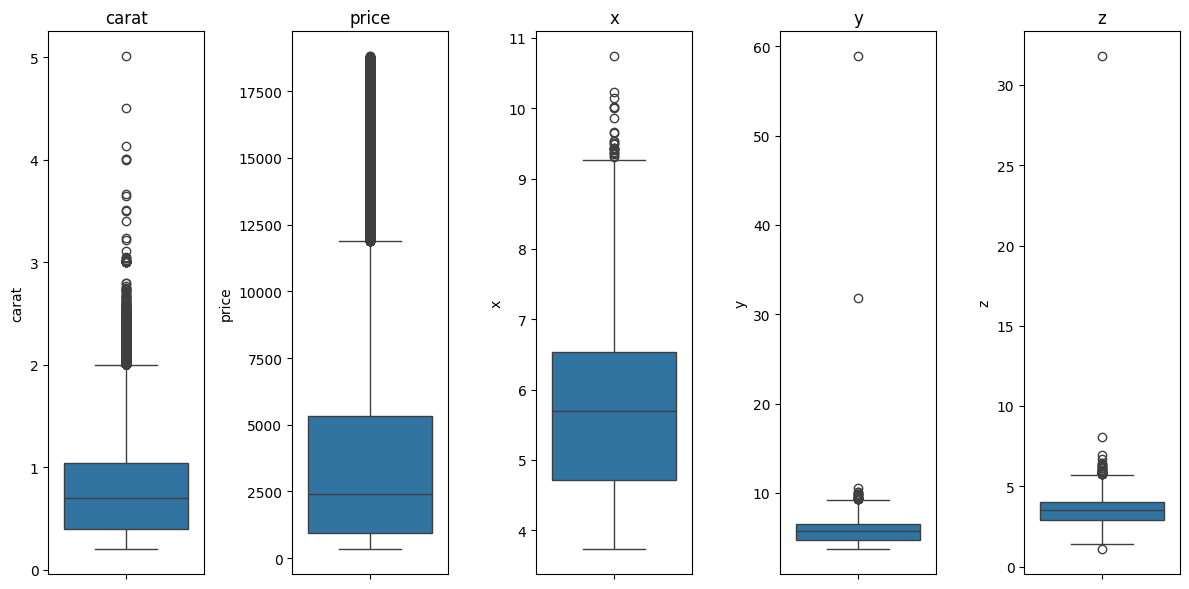

In [ ]:
#Outliers Handling
num_cols = ['carat', 'price', 'x', 'y', 'z']

plt.figure(figsize=(12,6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1,5,i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


In [ ]:
def iqr_capping(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower, lower,
                           np.where(df[column] > upper, upper, df[column]))


In [ ]:
for col in num_cols:
    iqr_capping(df, col)


In [ ]:
from scipy.stats import zscore

z_scores = np.abs(zscore(df[num_cols]))
(z_scores > 3).sum(axis=0)


array([ 0,  0, 35, 33, 40])

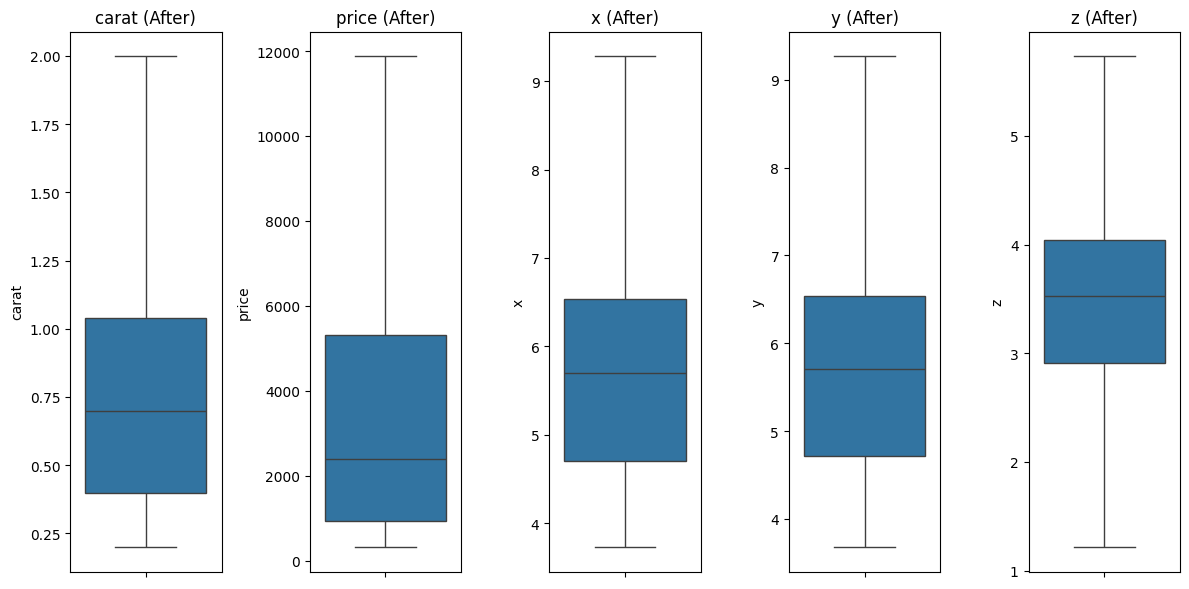

In [ ]:
plt.figure(figsize=(12,6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1,5,i)
    sns.boxplot(y=df[col])
    plt.title(col + " (After)")
plt.tight_layout()
plt.show()


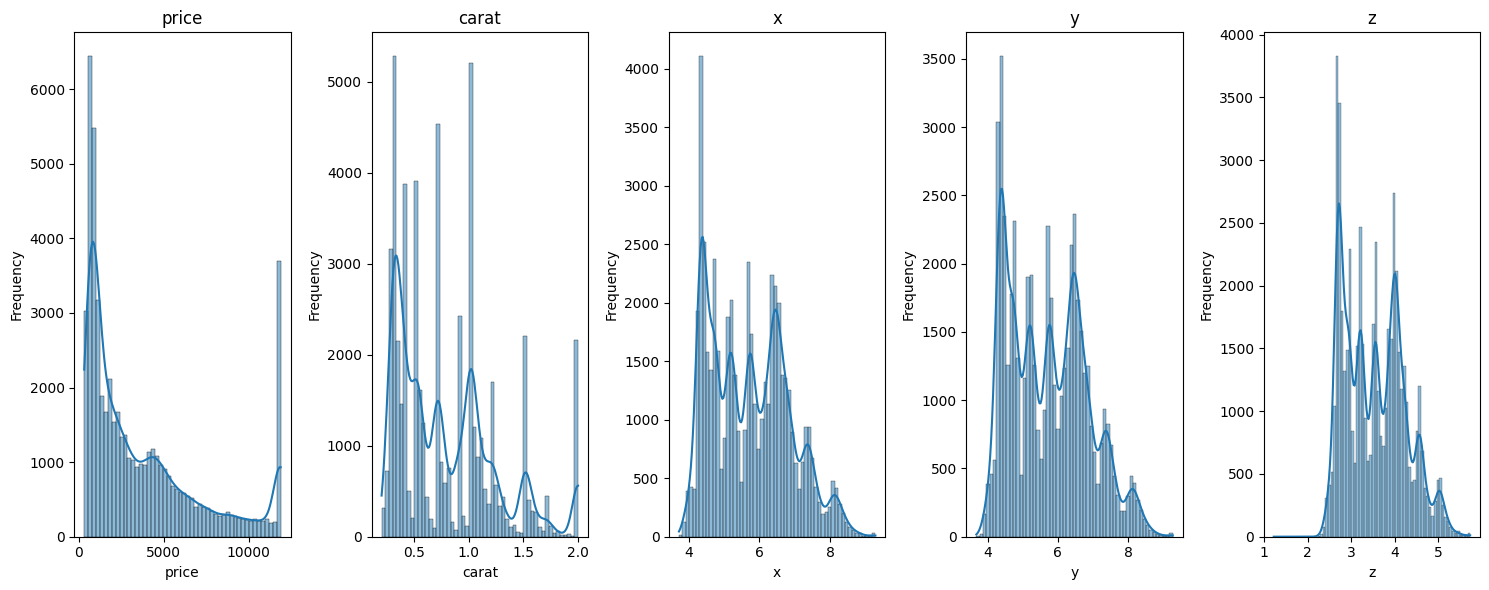

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['price','carat','x','y','z']

plt.figure(figsize=(15,6))

for i, col in enumerate(num_cols, 1):
    plt.subplot(1,5,i)
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In [ ]:
#Skewness Handling
df[['price','carat','x','y','z']].skew()


,0
price,1.148304
carat,0.899893
x,0.394179
y,0.389861
z,0.387198


In [ ]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757.0,6.15,6.12,3.74


In [ ]:
#Applying log transformation
import numpy as np

df['log_price'] = np.log1p(df['price'])
df['log_carat'] = np.log1p(df['carat'])
df['log_x'] = np.log1p(df['x'])
df['log_y'] = np.log1p(df['y'])
df['log_z'] = np.log1p(df['z'])


In [ ]:
df[['log_price','log_carat','log_x','log_y','log_z']].skew()


,0
log_price,0.031771
log_carat,0.494919
log_x,0.143609
log_y,0.141963
log_z,0.155042


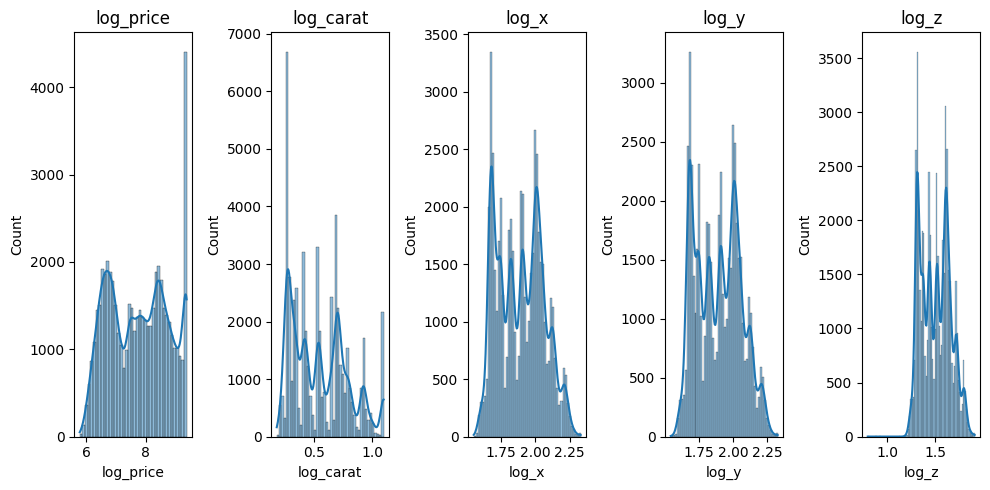

In [ ]:
#Visual Check
plt.figure(figsize=(10,5))
for i, col in enumerate(['log_price','log_carat','log_x','log_y','log_z'], 1):
    plt.subplot(1,5,i)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()


In [ ]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z,log_price,log_carat,log_x,log_y,log_z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43,5.789960,0.207014,1.599388,1.605430,1.232560
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31,5.789960,0.190620,1.587192,1.576915,1.196948
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31,5.793014,0.207014,1.619388,1.623341,1.196948
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63,5.814131,0.254642,1.648659,1.654411,1.289233
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75,5.817111,0.270027,1.675226,1.677097,1.321756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757.0,5.75,5.76,3.50,7.922261,0.542324,1.909543,1.911023,1.504077
53936,0.72,Good,D,SI1,63.1,55.0,2757.0,5.69,5.75,3.61,7.922261,0.542324,1.900614,1.909543,1.528228
53937,0.70,Very Good,D,SI1,62.8,60.0,2757.0,5.66,5.68,3.56,7.922261,0.530628,1.896119,1.899118,1.517323
53938,0.86,Premium,H,SI2,61.0,58.0,2757.0,6.15,6.12,3.74,7.922261,0.620576,1.967112,1.962908,1.556037


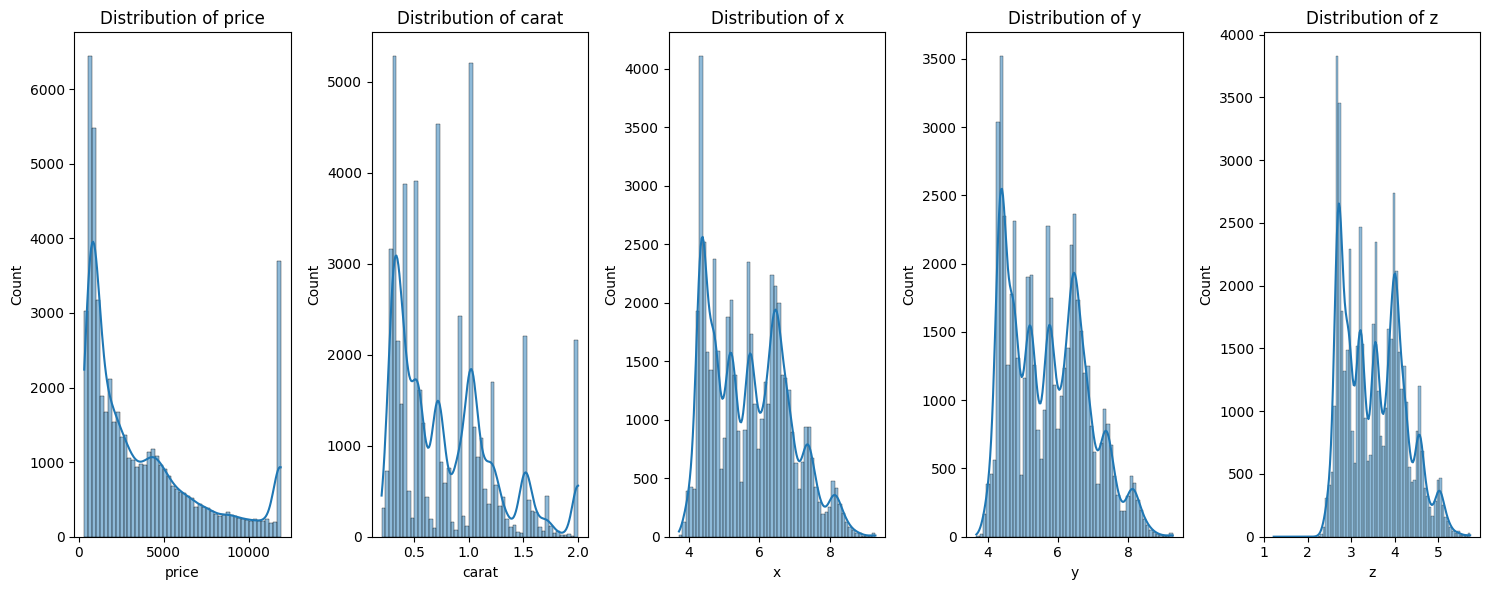

In [ ]:
# Exploratory Data Analysis (EDA):
#Analyses & Visualizations idea
num_cols = ['price', 'carat', 'x', 'y', 'z']

plt.figure(figsize=(15,6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1,5,i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


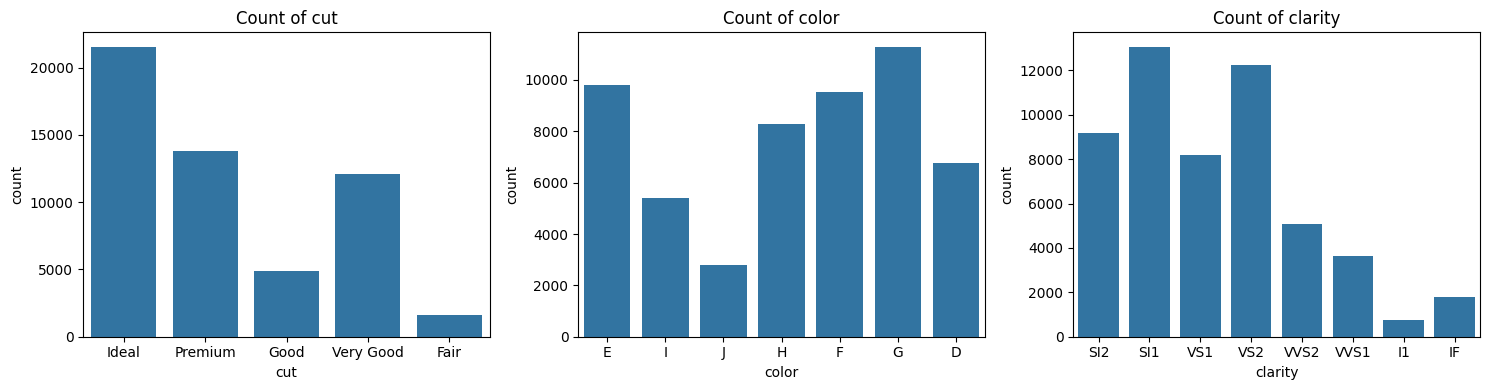

In [ ]:
#Count plots for categorical features (cut, color, clarity)
cat_cols = ['cut', 'color', 'clarity']

plt.figure(figsize=(15,4))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(1,3,i)
    sns.countplot(x=col, data=df)
    plt.title(f'Count of {col}')
plt.tight_layout()
plt.show()


In [ ]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z,log_price,log_carat,log_x,log_y,log_z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43,5.789960,0.207014,1.599388,1.605430,1.232560
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31,5.789960,0.190620,1.587192,1.576915,1.196948
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31,5.793014,0.207014,1.619388,1.623341,1.196948
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63,5.814131,0.254642,1.648659,1.654411,1.289233
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75,5.817111,0.270027,1.675226,1.677097,1.321756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757.0,5.75,5.76,3.50,7.922261,0.542324,1.909543,1.911023,1.504077
53936,0.72,Good,D,SI1,63.1,55.0,2757.0,5.69,5.75,3.61,7.922261,0.542324,1.900614,1.909543,1.528228
53937,0.70,Very Good,D,SI1,62.8,60.0,2757.0,5.66,5.68,3.56,7.922261,0.530628,1.896119,1.899118,1.517323
53938,0.86,Premium,H,SI2,61.0,58.0,2757.0,6.15,6.12,3.74,7.922261,0.620576,1.967112,1.962908,1.556037


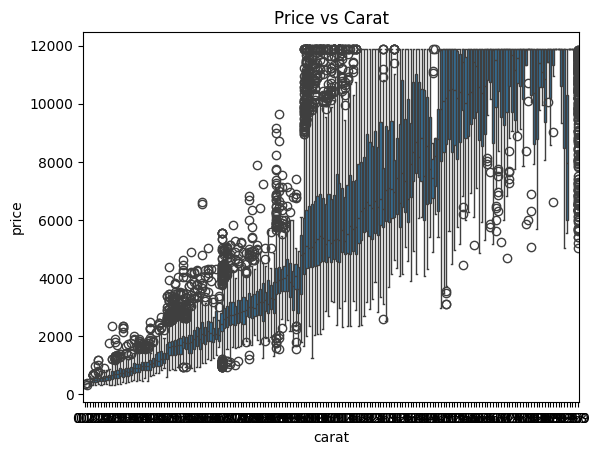

In [ ]:
#Price variation with carat using boxplots
sns.boxplot(x=df['carat'], y=df['price'])
plt.title("Price vs Carat")
plt.show()


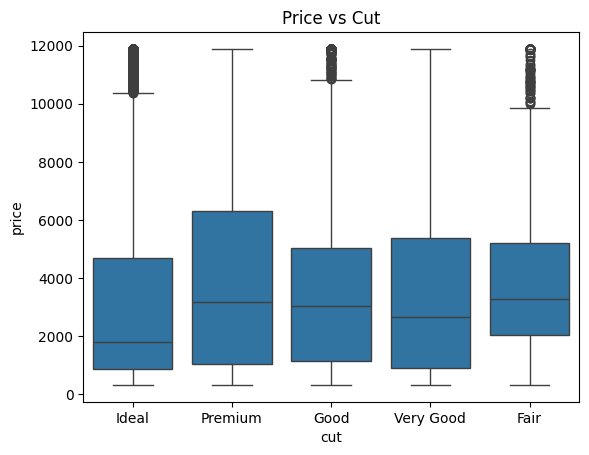

In [ ]:
#Price variation with cut using boxplots
sns.boxplot(x='cut', y='price', data=df)
plt.title("Price vs Cut")
plt.show()


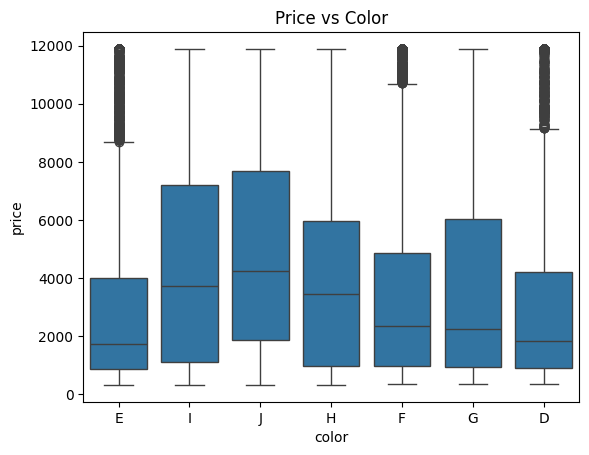

In [ ]:
#Price variation with color using boxplots
sns.boxplot(x='color', y='price', data=df)
plt.title("Price vs Color")
plt.show()


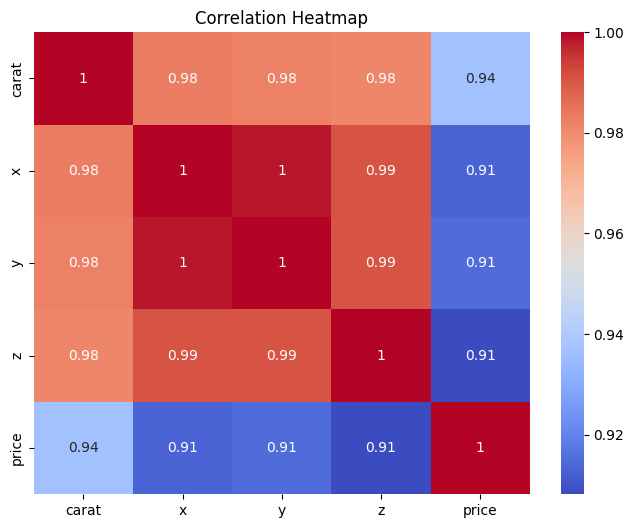

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['carat','x','y','z','price']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


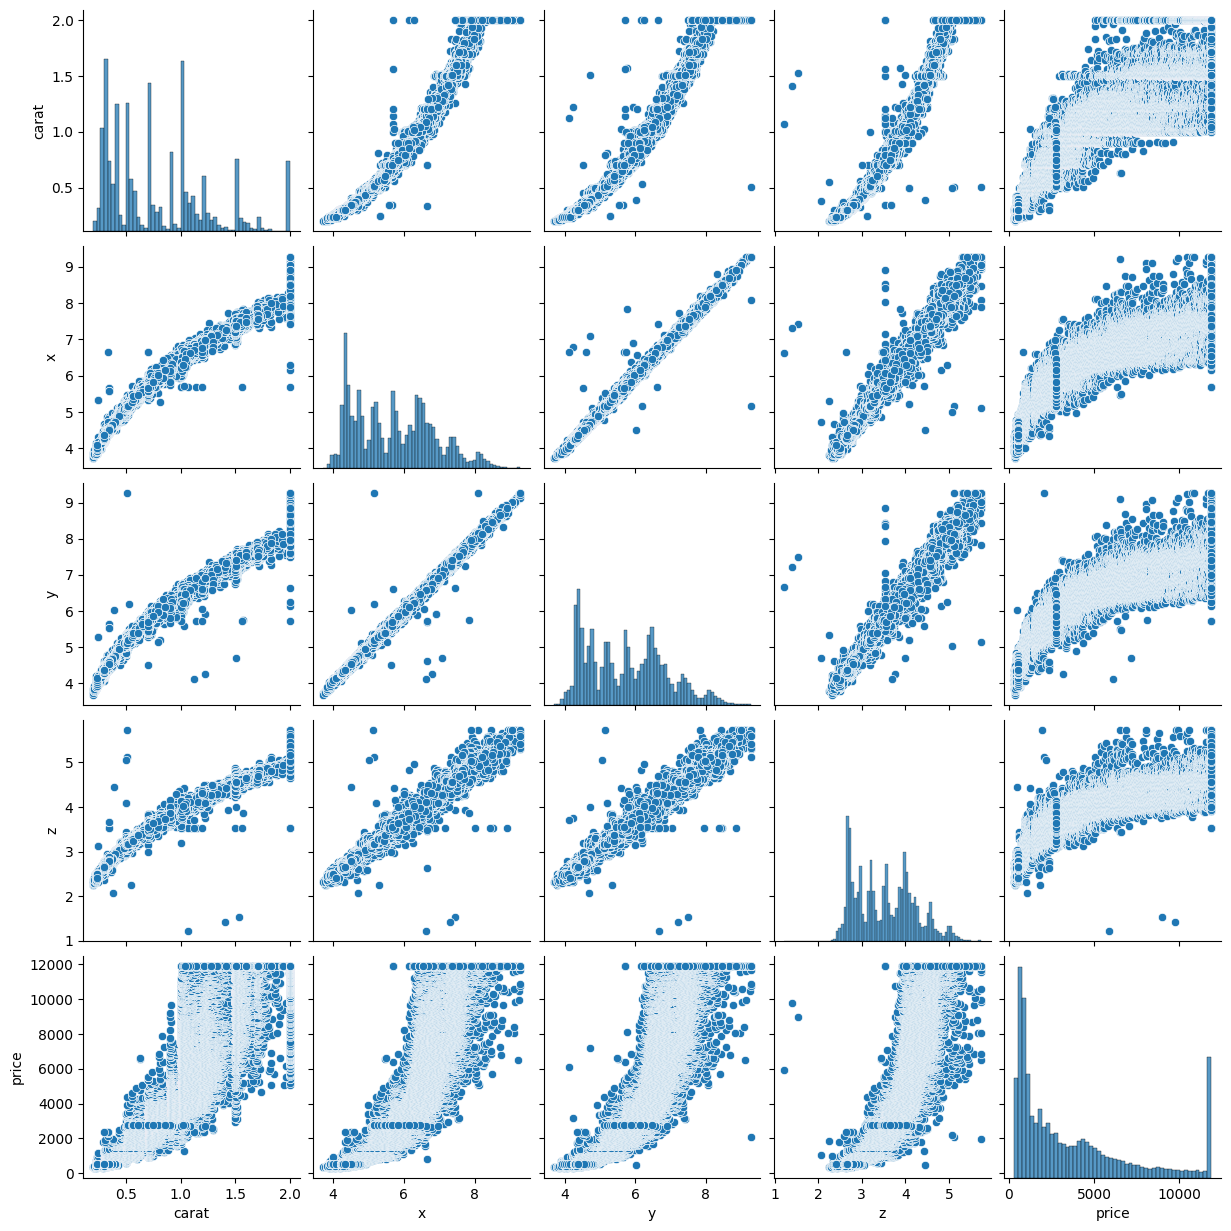

In [ ]:
sns.pairplot(df[['carat','x','y','z','price']])
plt.show()


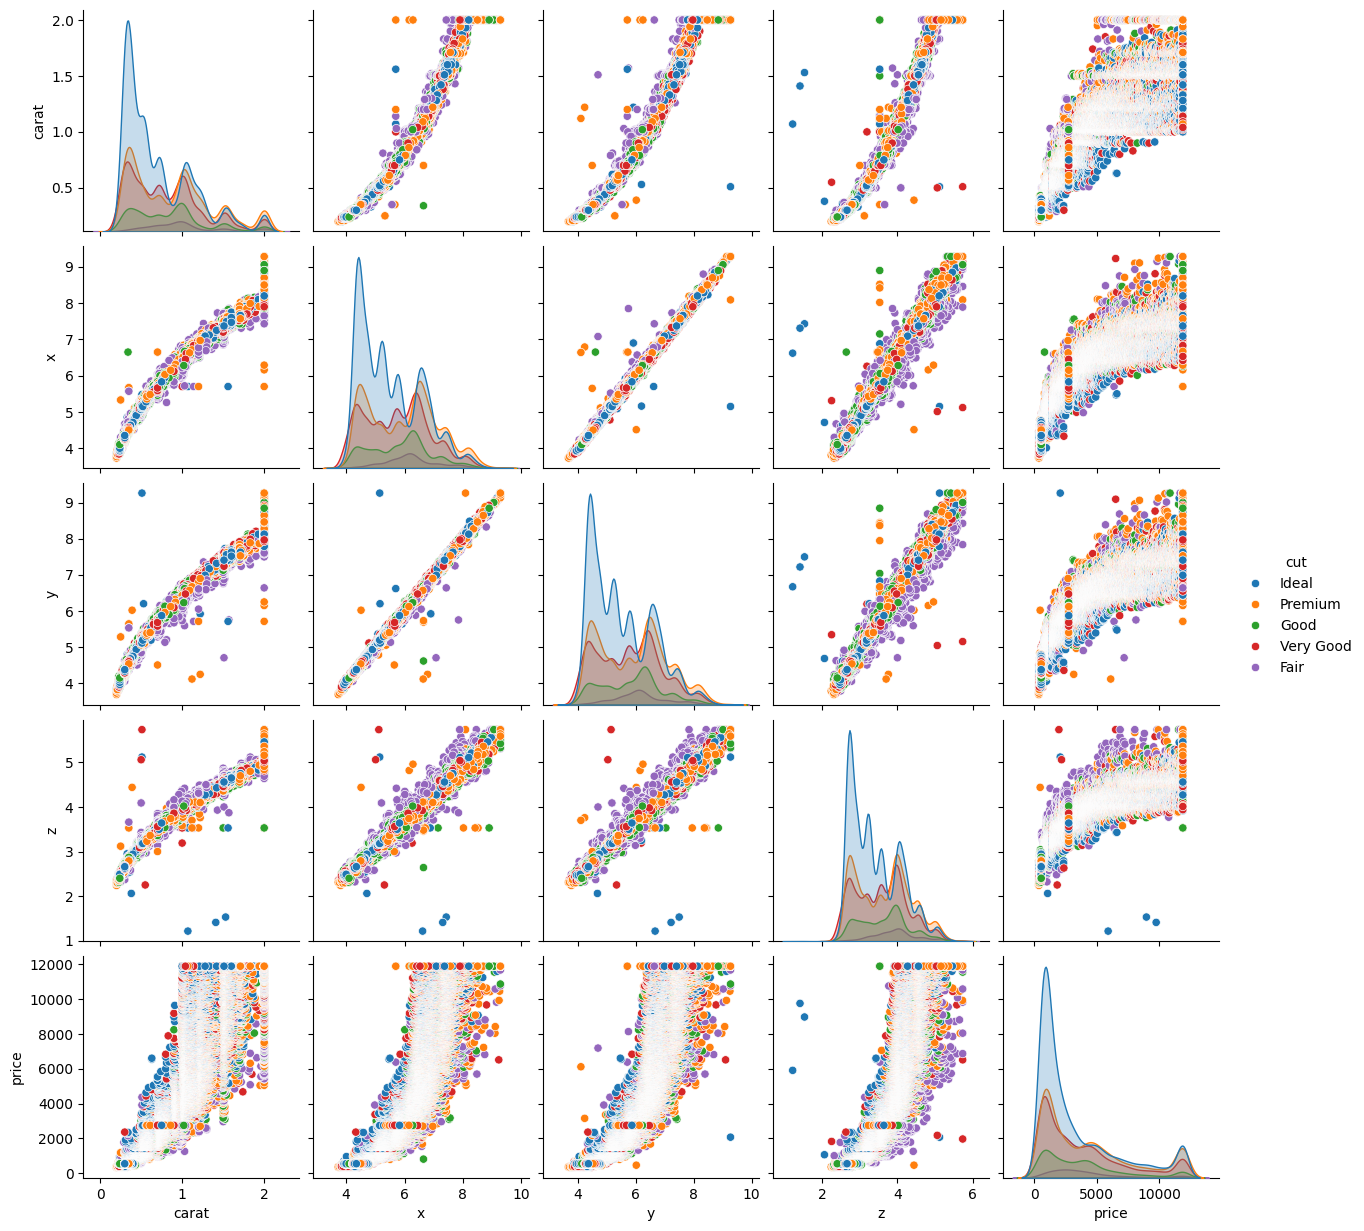

In [ ]:
sns.pairplot(df,
             vars=['carat','x','y','z','price'],
             hue='cut')
plt.show()


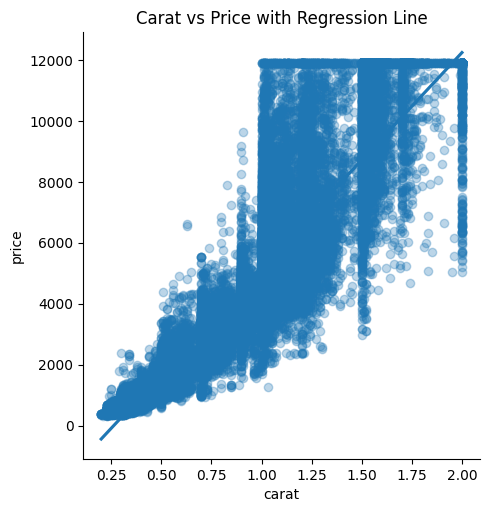

In [ ]:
sns.lmplot(x='carat', y='price', data=df,
           scatter_kws={'alpha':0.3})
plt.title("Carat vs Price with Regression Line")
plt.show()


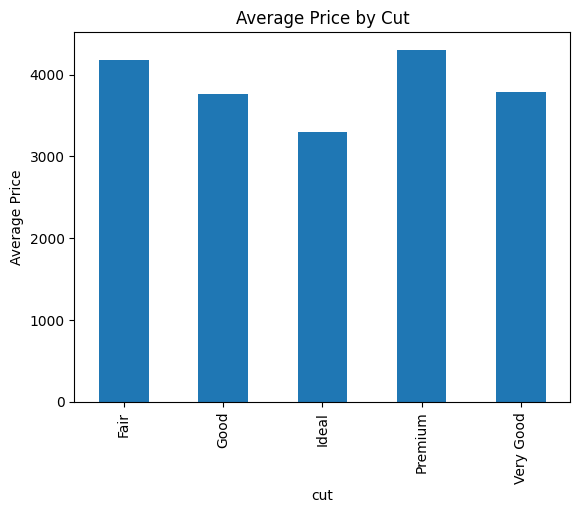

In [ ]:
df.groupby('cut')['price'].mean().plot(kind='bar')
plt.title("Average Price by Cut")
plt.ylabel("Average Price")
plt.show()


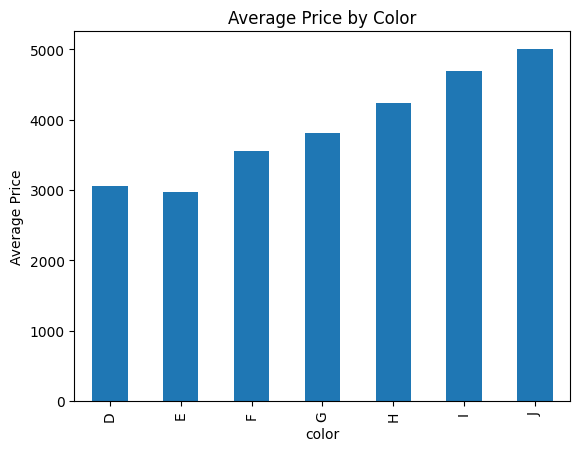

In [ ]:
df.groupby('color')['price'].mean().plot(kind='bar')
plt.title("Average Price by Color")
plt.ylabel("Average Price")
plt.show()


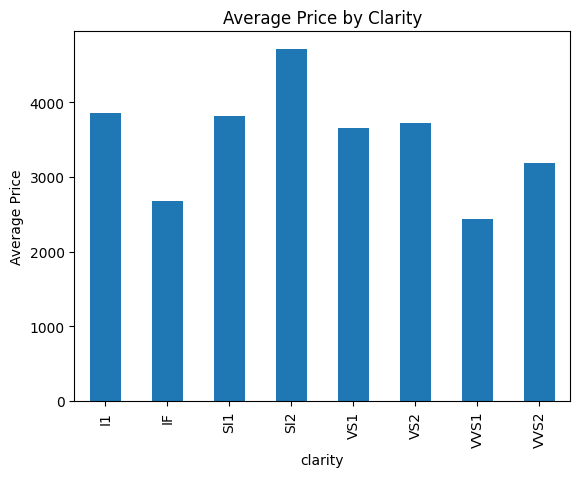

In [ ]:
df.groupby('clarity')['price'].mean().plot(kind='bar')
plt.title("Average Price by Clarity")
plt.ylabel("Average Price")
plt.show()


In [ ]:
#Feature Engineering
USD_TO_INR = 83
df['price_inr'] = df['price'] * USD_TO_INR


In [ ]:
#New Columns that are derived
df['volume'] = df['x'] * df['y'] * df['z']


In [ ]:
df['price_per_carat'] = df['price'] / df['carat']


In [ ]:
df['dimension_ratio'] = (df['x'] + df['y']) / (2 * df['z'])


In [ ]:
df['carat_category'] = pd.cut(
    df['carat'],
    bins=[0, 0.5, 1.5, df['carat'].max()],
    labels=['Light', 'Medium', 'Heavy']
)


In [ ]:
df['log_volume'] = np.log1p(df['volume']) #new column



In [ ]:
df['price_density'] = df['price'] / df['volume']


In [ ]:
df['size_category'] = pd.qcut(
    df['volume'],
    q=3,
    labels=['Small', 'Medium', 'Large']
)


In [ ]:
df.head()


,carat,cut,color,clarity,depth,table,price,x,y,z,...,log_y,log_z,price_inr,volume,price_per_carat,dimension_ratio,carat_category,log_volume,price_density,size_category
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43,...,1.605430,1.232560,27058.0,38.202030,1417.391304,1.631687,Light,3.668729,8.533578,Small
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31,...,1.576915,1.196948,27058.0,34.505856,1552.380952,1.673160,Light,3.569698,9.447672,Small
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31,...,1.623341,1.196948,27141.0,38.076885,1421.739130,1.757576,Light,3.665531,8.587887,Small
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63,...,1.654411,1.289233,27722.0,46.724580,1151.724138,1.602662,Light,3.865447,7.148272,Small
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75,...,1.677097,1.321756,27805.0,51.917250,1080.645161,1.580000,Light,3.968729,6.452576,Small


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   carat            53940 non-null  float64 
 1   cut              53940 non-null  object  
 2   color            53940 non-null  object  
 3   clarity          53940 non-null  object  
 4   depth            53940 non-null  float64 
 5   table            53940 non-null  float64 
 6   price            53940 non-null  float64 
 7   x                53940 non-null  float64 
 8   y                53940 non-null  float64 
 9   z                53940 non-null  float64 
 10  log_price        53940 non-null  float64 
 11  log_carat        53940 non-null  float64 
 12  log_x            53940 non-null  float64 
 13  log_y            53940 non-null  float64 
 14  log_z            53940 non-null  float64 
 15  price_inr        53940 non-null  float64 
 16  volume           53940 non-null  float64

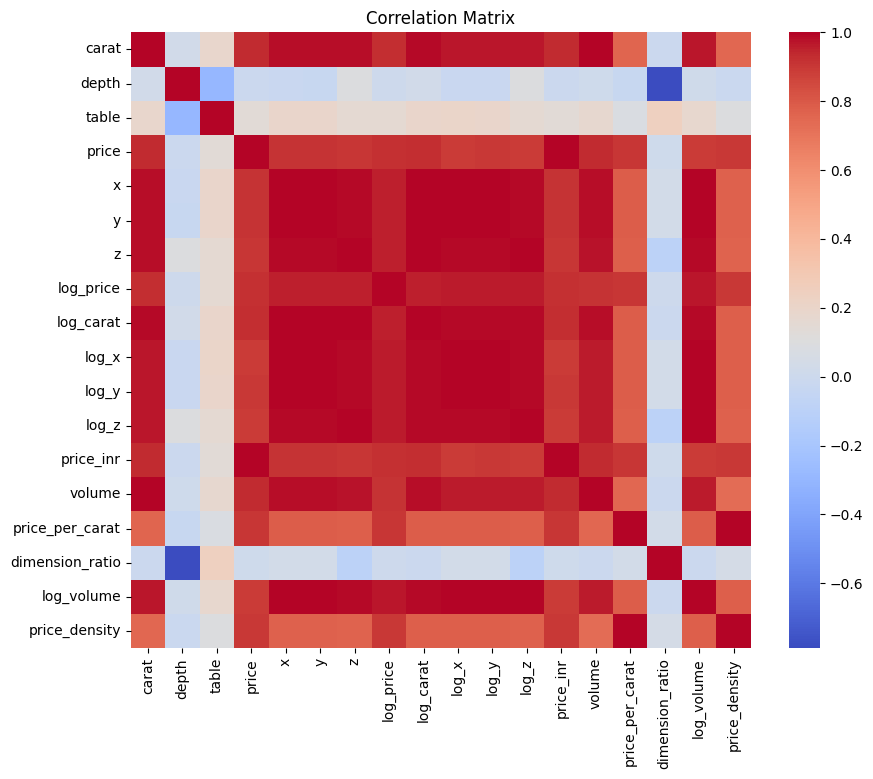

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(
    df.select_dtypes(include=np.number).corr(),
    cmap='coolwarm'
)
plt.title("Correlation Matrix")
plt.show()


In [ ]:
#x, y, z, volume → highly correlated

#carat & volume also strongly correlated

In [ ]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z', 'log_price', 'log_carat', 'log_x', 'log_y', 'log_z', 'price_inr',
       'volume', 'price_per_carat', 'dimension_ratio', 'log_volume',
       'price_density', 'carat_category_Medium', 'carat_category_Heavy',
       'size_category_Medium', 'size_category_Large'],
      dtype='object')

In [ ]:
df = df.drop(
    columns=['x','y','z','log_x','log_y','log_z','log_price']
)


In [ ]:
df

,carat,cut,color,clarity,depth,table,price,log_carat,price_inr,volume,price_per_carat,dimension_ratio,log_volume,price_density,carat_category_Medium,carat_category_Heavy,size_category_Medium,size_category_Large
0,0.23,2.0,1.0,3.0,61.5,55.0,326.0,0.207014,27058.0,38.202030,1417.391304,1.631687,3.668729,8.533578,False,False,False,False
1,0.21,3.0,1.0,2.0,59.8,61.0,326.0,0.190620,27058.0,34.505856,1552.380952,1.673160,3.569698,9.447672,False,False,False,False
2,0.23,1.0,1.0,4.0,56.9,65.0,327.0,0.207014,27141.0,38.076885,1421.739130,1.757576,3.665531,8.587887,False,False,False,False
3,0.29,3.0,5.0,5.0,62.4,58.0,334.0,0.254642,27722.0,46.724580,1151.724138,1.602662,3.865447,7.148272,False,False,False,False
4,0.31,1.0,6.0,3.0,63.3,58.0,335.0,0.270027,27805.0,51.917250,1080.645161,1.580000,3.968729,6.452576,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2.0,0.0,2.0,60.8,57.0,2757.0,0.542324,228831.0,115.920000,3829.166667,1.644286,4.761490,23.783644,True,False,True,False
53936,0.72,1.0,0.0,2.0,63.1,55.0,2757.0,0.542324,228831.0,118.110175,3829.166667,1.584488,4.780049,23.342612,True,False,True,False
53937,0.70,4.0,0.0,2.0,62.8,60.0,2757.0,0.530628,228831.0,114.449728,3938.571429,1.592697,4.748835,24.089179,True,False,True,False
53938,0.86,3.0,4.0,3.0,61.0,58.0,2757.0,0.620576,228831.0,140.766120,3205.813953,1.640374,4.954179,19.585679,True,False,True,False


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_cols = ['cut','color','clarity']

encoder = OrdinalEncoder()
df[ordinal_cols] = encoder.fit_transform(df[ordinal_cols])


In [ ]:
X = df.drop(columns=['price','price_inr'])
y = df['price']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   carat                  53940 non-null  float64
 1   cut                    53940 non-null  float64
 2   color                  53940 non-null  float64
 3   clarity                53940 non-null  float64
 4   depth                  53940 non-null  float64
 5   table                  53940 non-null  float64
 6   price                  53940 non-null  float64
 7   log_carat              53940 non-null  float64
 8   price_inr              53940 non-null  float64
 9   volume                 53940 non-null  float64
 10  price_per_carat        53940 non-null  float64
 11  dimension_ratio        53940 non-null  float64
 12  log_volume             53940 non-null  float64
 13  price_density          53940 non-null  float64
 14  carat_category_Medium  53940 non-null  bool   
 15  ca

In [ ]:
bool_cols = X.select_dtypes(include='bool').columns
X[bool_cols] = X[bool_cols].astype(int)


In [ ]:
X.select_dtypes(include=['object','category'])


""
0
1
2
3
4
...
53935
53936
53937
53938


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['price','price_inr'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R2": r2_score(y_test, y_pred)
    }


In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

lr_result = evaluate_model(lr, X_test, y_test)
lr_result


{'MAE': 256.2337111708578,
 'RMSE': np.float64(363.3723258229713),
 'R2': 0.9887266838624703}

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

dt_result = evaluate_model(dt, X_test, y_test)
dt_result


{'MAE': 17.945471820541343,
 'RMSE': np.float64(59.44250200067226),
 'R2': 0.9996983230345438}

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

rf_result = evaluate_model(rf, X_test, y_test)
rf_result


{'MAE': 8.16247908555803,
 'RMSE': np.float64(32.75811608712285),
 'R2': 0.9999083809416208}

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

knn_result = evaluate_model(knn, X_test, y_test)
knn_result


{'MAE': 52.145010659992586,
 'RMSE': np.float64(136.12110139864183),
 'R2': 0.998418027616872}

In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    random_state=42
)
xgb.fit(X_train, y_train)

xgb_result = evaluate_model(xgb, X_test, y_test)
xgb_result


{'MAE': 19.219507151636584,
 'RMSE': np.float64(36.92488289586637),
 'R2': 0.9998835910848157}

In [ ]:
import pandas as pd

results = pd.DataFrame({
    "Linear Regression": lr_result,
    "Decision Tree": dt_result,
    "Random Forest": rf_result,
    "KNN": knn_result,
    "XGBoost": xgb_result
}).T

results


,MAE,RMSE,R2
Linear Regression,256.233711,363.372326,0.988727
Decision Tree,17.945472,59.442502,0.999698
Random Forest,8.162479,32.758116,0.999908
KNN,52.145011,136.121101,0.998418
XGBoost,19.219507,36.924883,0.999884


In [ ]:
#lowest MAE and RMSE and the highest R² score - RF

In [ ]:
import pickle

pickle.dump(rf, open("best_price_model.pkl", "wb"))


In [ ]:
results.to_csv("regression_results.csv")


In [ ]:
#ANN
X = df.drop(columns=['price','price_inr'])
y = df['price']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

ann = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)   # Regression output
])

ann.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse'
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = ann.fit(
    X_train_scaled,
    y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/30
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 9149886.0000 - val_loss: 80807.9141
Epoch 2/30
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 61591.1875 - val_loss: 42967.2109
Epoch 3/30
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 34291.2109 - val_loss: 23721.1309
Epoch 4/30
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 19336.6973 - val_loss: 17520.7266
Epoch 5/30
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 12832.7109 - val_loss: 10030.1777
Epoch 6/30
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 6808.7993 - val_loss: 5183.2651
Epoch 7/30
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 3299.4543 - val_loss: 4575.5356
Epoch 8/30
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2369.8323 - val_loss: 3105.1863
Epoch 9/30
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1734.1600 - val_loss: 2022.9622
Epoch 10/30
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1365.0676 - val_loss: 3142.0156
Epoch 11/30
1079/1079 ━━━━━━━━━━━━━━━━━━━━ 3s 

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred_ann = ann.predict(X_test_scaled).flatten()

ann_mae = mean_absolute_error(y_test, y_pred_ann)
ann_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ann))
ann_r2 = r2_score(y_test, y_pred_ann)

ann_mae, ann_rmse, ann_r2


338/338 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


(15.64641156619153, np.float64(73.07796524575764), 0.9995440461556513)

In [ ]:
results.loc['ANN'] = [ann_mae, ann_rmse, ann_r2]
results


,MAE,RMSE,R2
Linear Regression,256.233711,363.372326,0.988727
Decision Tree,17.945472,59.442502,0.999698
Random Forest,8.162479,32.758116,0.999908
KNN,52.145011,136.121101,0.998418
XGBoost,19.219507,36.924883,0.999884
ANN,15.646412,73.077965,0.999544


In [ ]:
# Save ANN model
ann.save("ann_price_model.h5")

# Save scaler
import pickle
pickle.dump(scaler, open("ann_scaler.pkl", "wb"))


In [ ]:
ann.save("ann_price_model.keras")


In [ ]:
#Clustering (Market Segmentation)

In [ ]:
cluster_df = df.drop(columns=['price', 'price_inr'])


In [ ]:
cluster_df.select_dtypes(include=['object','category'])


""
0
1
2
3
4
...
53935
53936
53937
53938


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler_cluster = StandardScaler()
cluster_scaled = scaler_cluster.fit_transform(cluster_df)


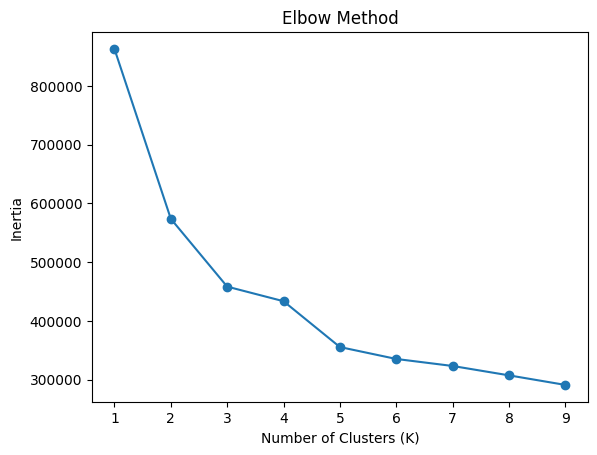

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(1, 10)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(cluster_scaled)
    inertia.append(km.inertia_)

plt.plot(K, inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(cluster_scaled)


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(cluster_scaled)


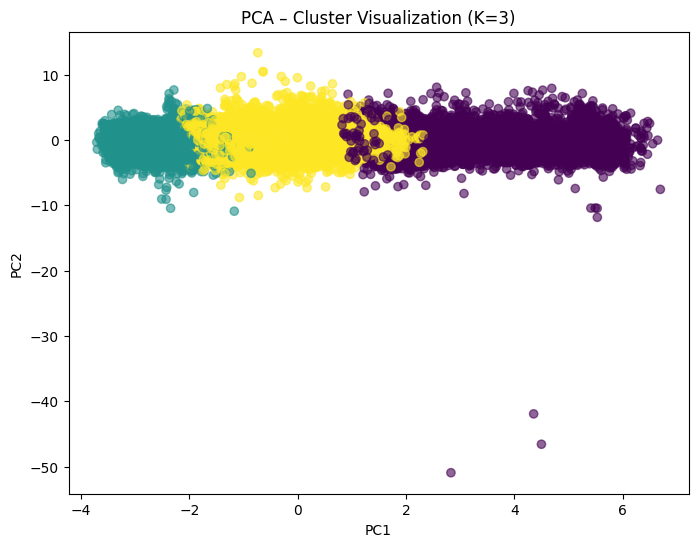

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_data = pca.fit_transform(cluster_scaled)

plt.figure(figsize=(8,6))
plt.scatter(pca_data[:,0], pca_data[:,1], c=df['cluster'], cmap='viridis', alpha=0.6)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA – Cluster Visualization (K=3)")
plt.show()


In [ ]:
cluster_profile = df.groupby('cluster')[['price','carat','volume','price_per_carat']].mean()
cluster_profile


,price,carat,volume,price_per_carat
cluster,,,,
0,7739.037585,1.326902,218.012533,5779.075071
1,807.749986,0.349179,57.389294,2297.991117
2,2669.033066,0.705674,114.625859,3681.193688


In [ ]:
df.groupby('cluster')['cut'].mean()


,cut
cluster,
0,2.624146
1,2.546408
2,2.487530


In [ ]:
cluster_names = {
    0: "Affordable Small Diamonds",
    1: "Mid-range Balanced Diamonds",
    2: "Premium Heavy Diamonds"
}

df['cluster_name'] = df['cluster'].map(cluster_names)


In [ ]:
import pickle

pickle.dump(kmeans, open("diamond_cluster_model.pkl", "wb"))
pickle.dump(pca, open("pca_model.pkl", "wb"))
pickle.dump(scaler_cluster, open("cluster_scaler.pkl", "wb"))
